# Notebook for Topic 2 - Models

<hr style="border-top: 1px solid #001a79;" />

## Exercise 1

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [1]:
# Import all used libraries

# Numpy for numerical arrays
import numpy as np

# matplotlib for plots
import matplotlib.pyplot as plt

#### Plot absolute value function

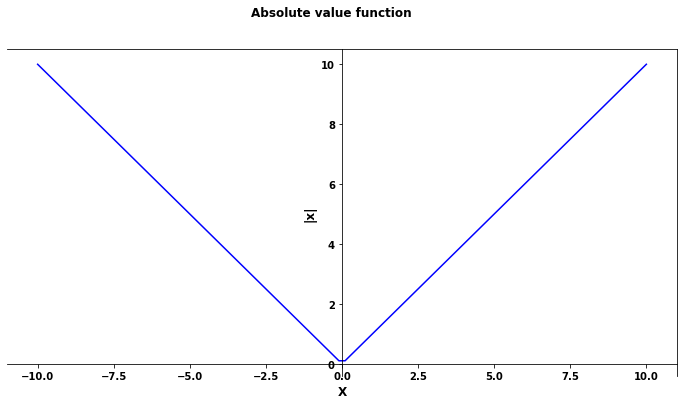

In [6]:
# Create a plot to visualize Data Set 1 with 2nd degree polynomial fit 
fig, ax = plt.subplots(figsize=(12,6))

# create x values for plot
x = np.linspace(-10, 10, 100)


fig.suptitle("Absolute value function")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('|x|', fontsize=12)

# X and Y axis default position moved as per https://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot
# set the x-spine
ax.spines['left'].set_position('zero')

# set the y-spine
ax.spines['bottom'].set_position('zero')


# Plot Data Set 1 points:
ax.plot(x, np.abs(x), 'b-', label="Absolute value function");

Absolute value function used for calculating Mean Absolute Error in Machine Learning Regression:

https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3


Blog about cost functions for fitting a straight line:
https://towardsdatascience.com/the-world-of-cost-functions-inclusivity-majoritarianism-and-oligarchy-51362b8b91f4

<hr style="border-top: 1px solid #001a79;" />

## Exercise 2

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

In [8]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

#### Plot the points

In [ ]:
# Create a plot to visualize Data Set 1 with 2nd degree polynomial fit 
fig, ax = plt.subplots(figsize=(12,6))

fig.suptitle("Scatter plot of points for ")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('|x|', fontsize=12)

# X and Y axis default position moved as per https://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot
# set the x-spine
ax.spines['left'].set_position('zero')

# set the y-spine
ax.spines['bottom'].set_position('zero')


# Plot Data Set 1 points:
ax.plot(x, np.abs(x), 'b-', label="Absolute value function");

___
# End